In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random

import warnings
warnings.filterwarnings("ignore")

import glob

from sklearn.model_selection import train_test_split

In [2]:
masks = glob.glob("../data/Dataset_BUSI_with_GT/*/*_mask.png")

In [3]:
masks[1:4]

['../data/Dataset_BUSI_with_GT\\benign\\benign (10)_mask.png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (100)_mask.png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (101)_mask.png']

In [4]:
images = [mask_images.replace("_mask", "") for mask_images in masks]

In [5]:
images

['../data/Dataset_BUSI_with_GT\\benign\\benign (1).png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (10).png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (100).png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (101).png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (102).png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (103).png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (104).png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (105).png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (106).png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (107).png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (108).png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (109).png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (11).png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (110).png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (111).png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (112).png',
 '../data/Dataset_BUSI_with_GT\\benign\\benign (113).png',
 

In [6]:
series = list(zip(images, masks))

In [7]:
series[:4]

[('../data/Dataset_BUSI_with_GT\\benign\\benign (1).png',
  '../data/Dataset_BUSI_with_GT\\benign\\benign (1)_mask.png'),
 ('../data/Dataset_BUSI_with_GT\\benign\\benign (10).png',
  '../data/Dataset_BUSI_with_GT\\benign\\benign (10)_mask.png'),
 ('../data/Dataset_BUSI_with_GT\\benign\\benign (100).png',
  '../data/Dataset_BUSI_with_GT\\benign\\benign (100)_mask.png'),
 ('../data/Dataset_BUSI_with_GT\\benign\\benign (101).png',
  '../data/Dataset_BUSI_with_GT\\benign\\benign (101)_mask.png')]

In [8]:
def plot_train_label(image_mask):
    image = cv2.imread(image_mask[0])
    mask = cv2.imread(image_mask[1])
    
    f, axarr = plt.subplots(1, 3, figsize=(15, 15))
    
    axarr[0].imshow(np.squeeze(image), cmap='gray', origin='lower')
    axarr[0].set_ylabel('Axial View', fontsize=14)
    axarr[0].set_xticks([])
    axarr[0].set_yticks([])
    axarr[0].set_title('CT', fontsize=14)

    axarr[1].imshow(np.squeeze(mask), cmap='jet', origin='lower')
    axarr[1].axis('off')
    axarr[1].set_title('Mask', fontsize=14)

    axarr[2].imshow(np.squeeze(image), cmap='gray', alpha=1, origin='lower')
    axarr[2].imshow(np.squeeze(mask), cmap='jet', alpha=0.5, origin='lower')
    axarr[2].axis('off')
    axarr[2].set_title('Overlay', fontsize=14)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

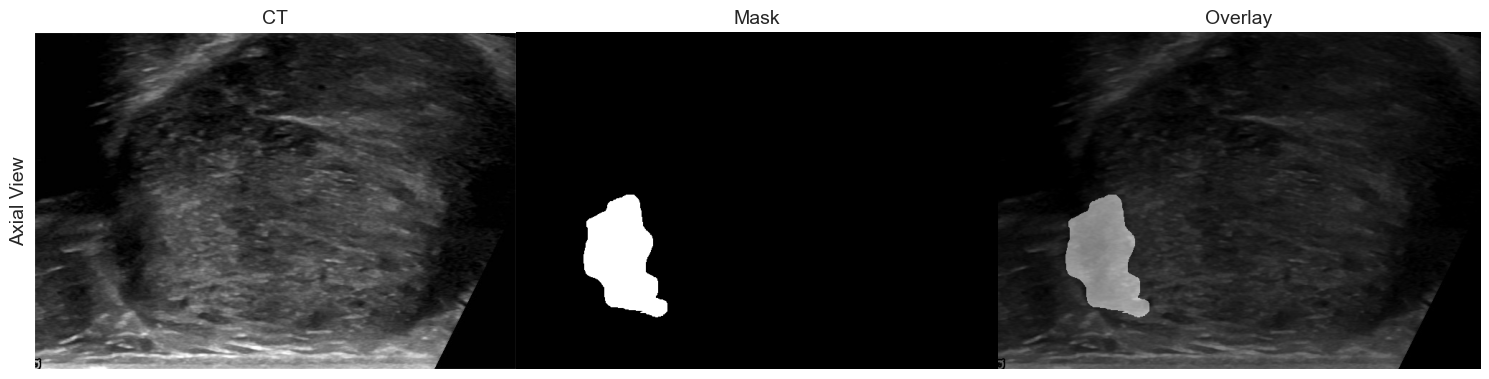

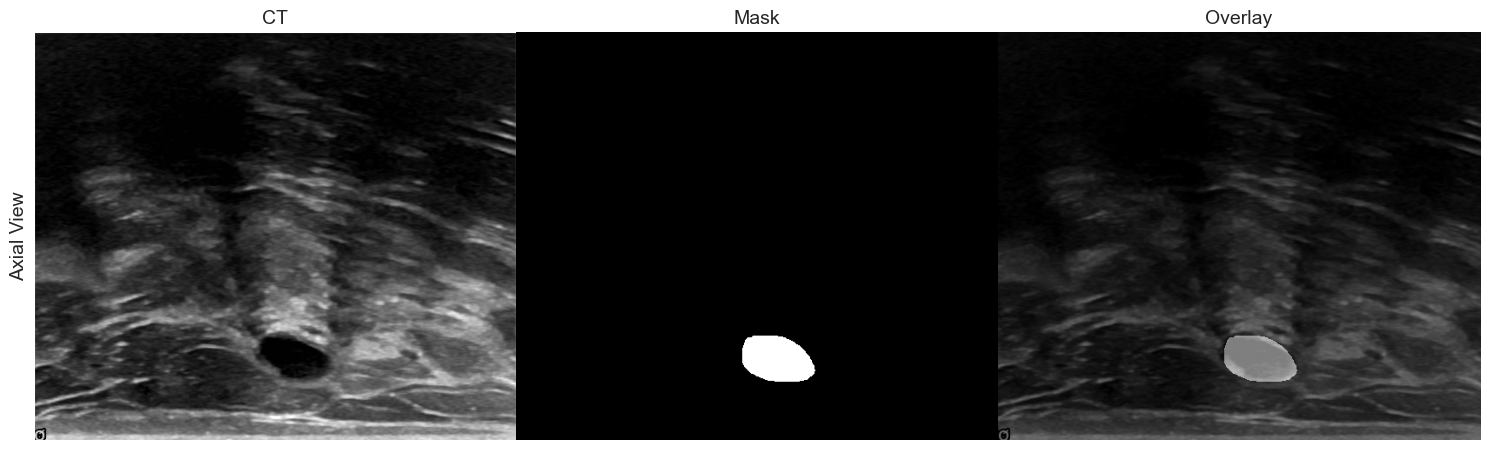

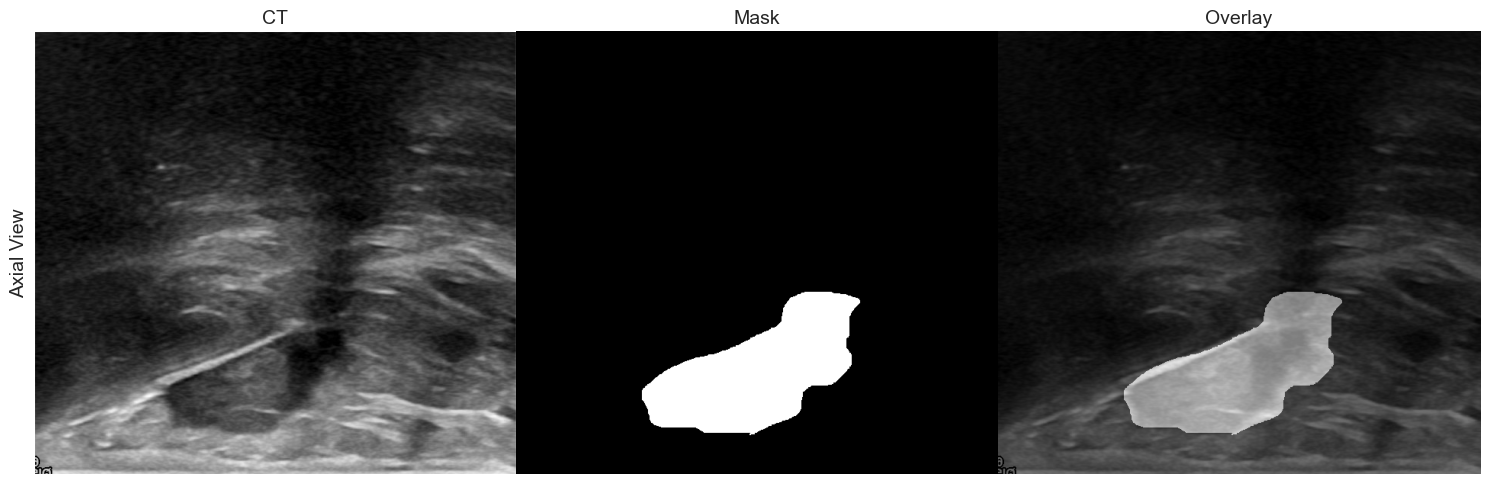

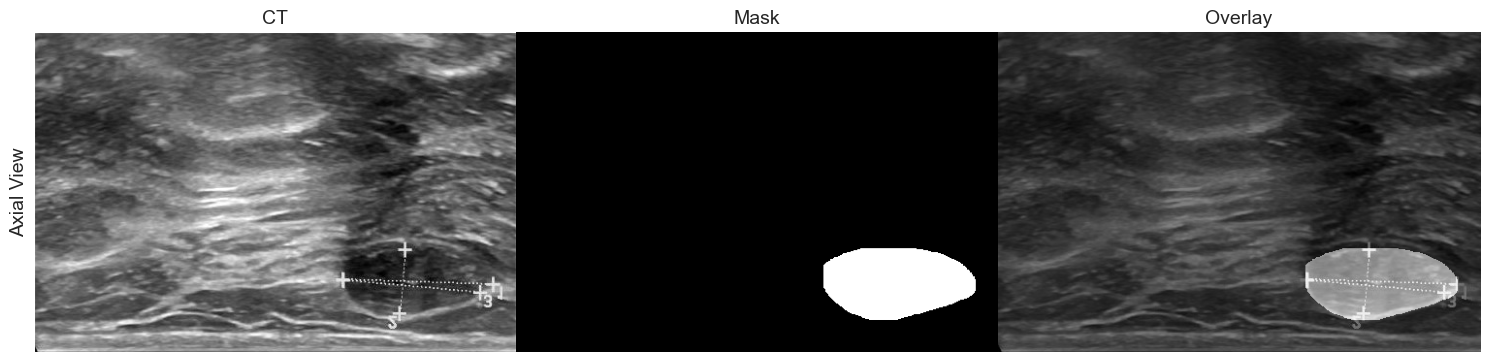

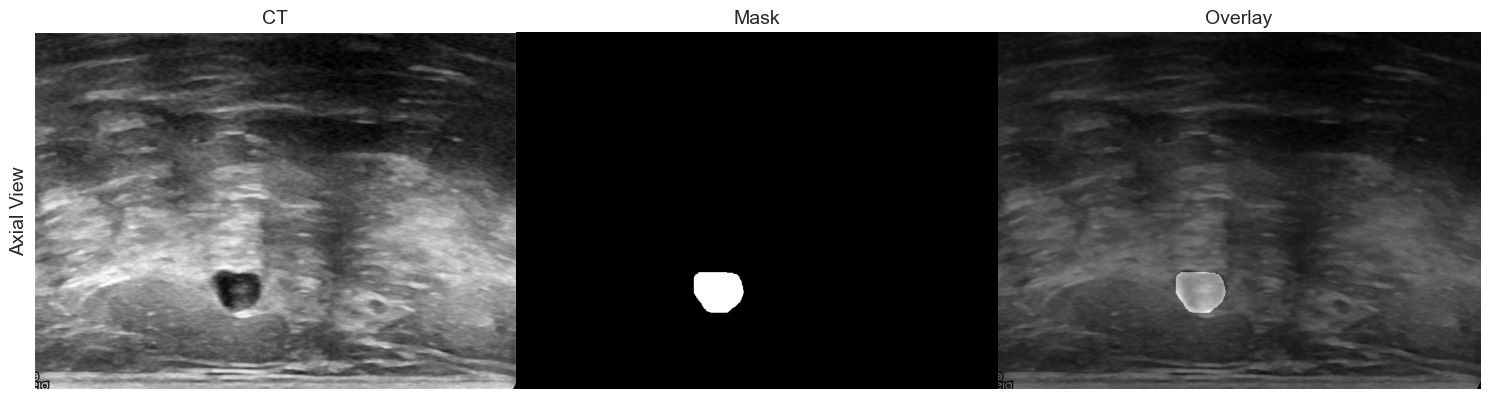

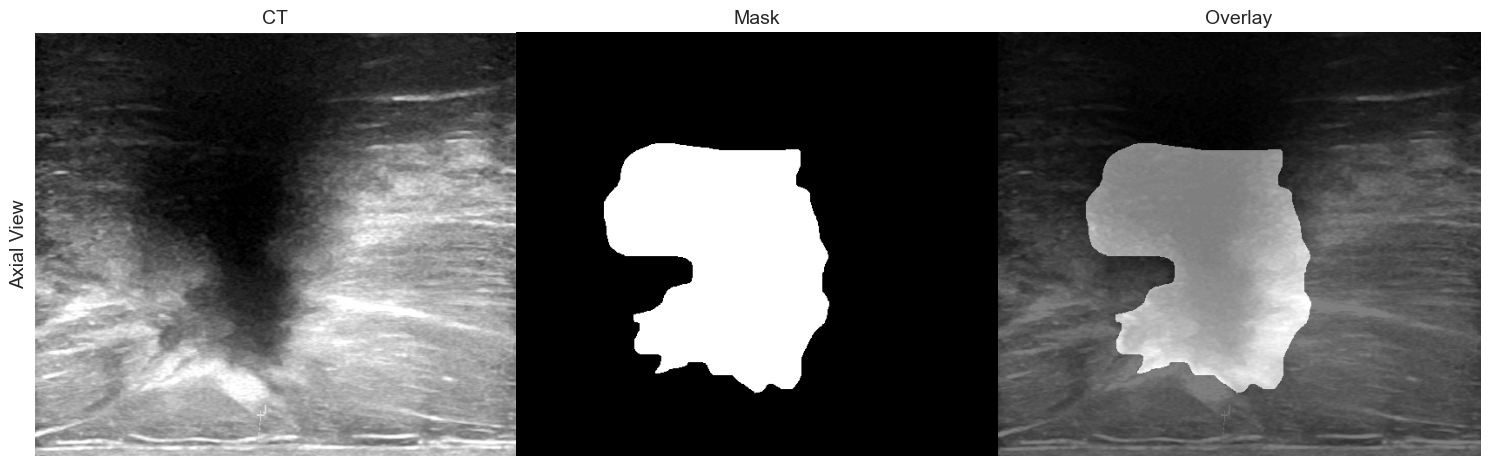

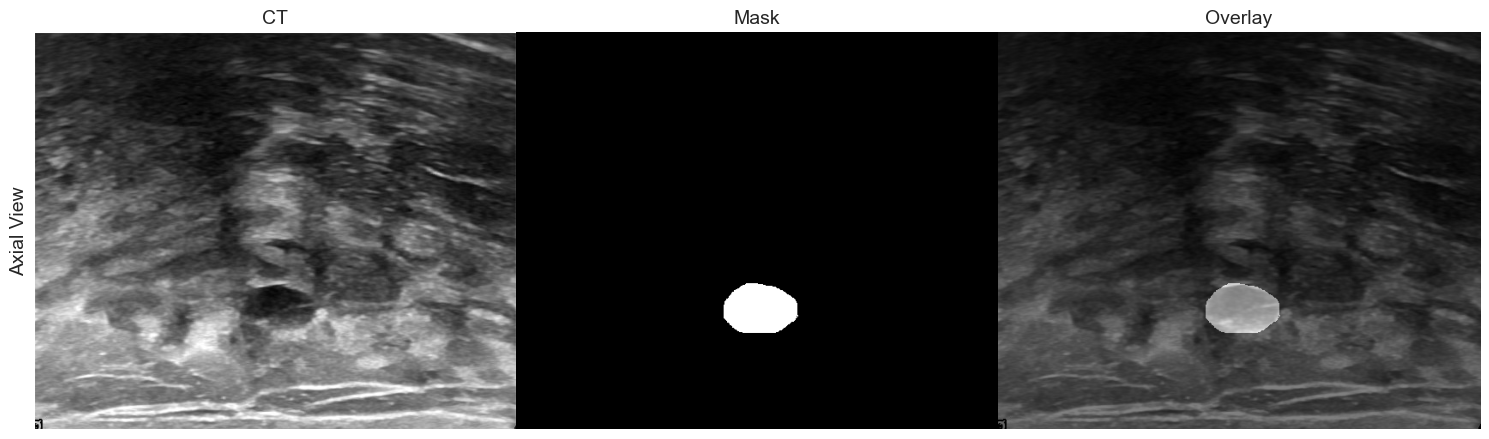

In [9]:
random_image = random.sample(range(750), 7)
for image in random_image:
    plot_train_label(series[image])

In [21]:
dataset = pd.DataFrame(series, columns=['image_path', 'mask_path'])

In [22]:
dataset

,image_path,mask_path
0,../data/Dataset_BUSI_with_GT\benign\benign (1)...,../data/Dataset_BUSI_with_GT\benign\benign (1)...
1,../data/Dataset_BUSI_with_GT\benign\benign (10...,../data/Dataset_BUSI_with_GT\benign\benign (10...
2,../data/Dataset_BUSI_with_GT\benign\benign (10...,../data/Dataset_BUSI_with_GT\benign\benign (10...
3,../data/Dataset_BUSI_with_GT\benign\benign (10...,../data/Dataset_BUSI_with_GT\benign\benign (10...
4,../data/Dataset_BUSI_with_GT\benign\benign (10...,../data/Dataset_BUSI_with_GT\benign\benign (10...
...,...,...
775,../data/Dataset_BUSI_with_GT\normal\normal (95...,../data/Dataset_BUSI_with_GT\normal\normal (95...
776,../data/Dataset_BUSI_with_GT\normal\normal (96...,../data/Dataset_BUSI_with_GT\normal\normal (96...
777,../data/Dataset_BUSI_with_GT\normal\normal (97...,../data/Dataset_BUSI_with_GT\normal\normal (97...
778,../data/Dataset_BUSI_with_GT\normal\normal (98...,../data/Dataset_BUSI_with_GT\normal\normal (98...


In [23]:
train, test= train_test_split(dataset, test_size=0.2)

In [24]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch
torch.cuda.set_device(0)

In [25]:
import torch.optim as optim

In [92]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import pandas as pd
import cv2 as cv

class CustomImageMaskDataset(Dataset):
    def __init__(self, dataframe, image_transform=None):
        self.data = dataframe
        self.image_transform = image_transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path = self.data.iloc[idx]['image_path']
        mask_path = self.data.iloc[idx]['mask_path']

        image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        mask = cv.imread(mask_path, cv.IMREAD_GRAYSCALE)

        if self.image_transform:
            image = self.image_transform(image)
            mask = self.image_transform(mask)
        return image, mask

# Define transformations for images and masks
transforms = transforms.Compose([
    # transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Resize((256, 256))
])


In [93]:
train_dataset = CustomImageMaskDataset(train, transforms)
test_dataset = CustomImageMaskDataset(test, transforms)
# Create a data loader to iterate over the dataset
batch_size = 32  # Set your desired batch size
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [94]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [95]:
device

device(type='cuda', index=0)

In [96]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class ConvBlock(nn.Module):

    def __init__(self, input_channel, out_channel):
        super().__init__()
        self.conv2d_1 = nn.Conv2d(input_channel, out_channel, kernel_size=3, padding='same')
        self.batchnorm_1 = nn.BatchNorm2d(out_channel)
        self.gelu_1 = nn.GELU()

        self.conv2d_2 = nn.Conv2d(input_channel, out_channel, kernel_size=3, padding='same')
        self.batchnorm_2 = nn.BatchNorm2d(out_channel)
        self.gelu_2 = nn.GELU()

    def forward(self, x):
        x = self.conv2d_1(x)
        x = self.batchnorm_1(x)
        x = self.gelu_1(x)

        x = self.conv2d_2(x)
        x = self.batchnorm_2(x)
        x = self.gelu_2(x)

        return x

class Encoder(nn.Module):

    def __init__(self, input_channel, out_channel):
        super().__init__()
        self.conv2d_1 = ConvBlock(input_channel, out_channel)
        self.maxpool = nn.MaxPool2d((2,2))

    def forward(self, x):
        x = self.conv2d_1(x)
        p = self.maxpool(x)

        return x, p

class Decoder(nn.Module):

    def __init__(self, input_channel, output_channel):
        super().__init__()
        self.conv_t = nn.ConvTranspose2d(input_channel, output_channel, stride=2, kernel_size=3)
        self.conv2d_1 = ConvBlock(input_channel, output_channel)

    def forward(self, x, skip):
        x = self.conv_t(x)
        x = torch.cat([x, skip], dim=1)
        x = self.conv2d_1(x)

        return x

In [97]:
class Unet(nn.Module):

    def __init__(self, input_channel=3):
        super().__init__()
        self.encoder_1 = Encoder(input_channel, 64)
        self.encoder_2 = Encoder(64, 128)
        self.encoder_3 = Encoder(128, 256)
        self.encoder_4 = Encoder(256, 512)

        self.conv_block = ConvBlock(512, 1024)

        self.decoder_1 = Decoder(1024, 512)
        self.decoder_2 = Decoder(512, 256)
        self.decoder_3 = Decoder(256, 128)
        self.decoder_4 = Decoder(128, 64)

        self.cls = nn.Conv2d(64, 1, kernel_size=1, padding=0)

    def forward(self, x):

        """ ------ Encoder ------"""
        x1, p1 = self.encoder_1(x)
        x2, p2 = self.encoder_2(p1)
        x3, p3 = self.encoder_3(p2)
        x4, p4 = self.encoder_4(p3)

        """ ------ BottleNeck ------"""
        x5 = self.conv_block(p4)

        """ ------ Decoder ------"""
        x6 = self.decoder_1(x5, x4)
        x7 = self.decoder_2(x6, x3)
        x8 = self.decoder_3(x7, x2)
        x9 = self.decoder_4(x8, x1)

        """ ------ Final Layer ------"""
        x_final = self.cls(x9)

        return x_final


In [98]:
class Trainer:

    def __init__(self, model, num_epochs, model_dir, optimizer, criterion, device, min_delta=0.001, patience=7):
        self.num_epochs = num_epochs
        self.model_dir = model_dir
        self.optimizer = optimizer
        self.criterion = criterion
        self.model = model
        self.device = device
        self.log_interval = 3
        self.patience = patience
        self.min_delta = min_delta


    def dice_coeff(self, pred, target):
        pred = pred.float()
        target = target.float()

        intersection = (pred * target).sum()
        union = pred.sum() + target.sum()

        dice = (2 * intersection + 1e-15) / (union + 1e-15)
        return dice

    def train(self, train_loader, val_loader):
        for epoch in range(self.num_epochs):
            train_loss = 0.0
            val_loss = 0.0
            train_dice = 0.0
            val_dice = 0.0
            best_dice = 0.0
            patience_counter = 0

            # Training loop
            for i, (images, masks) in enumerate(train_loader):
                # Move tensors to the configured device
                images = images.to(self.device)
                masks = masks.to(self.device)

                # Set the model to training mode
                self.model.train()

                # Forward pass
                outputs = self.model(images)

                # Compute loss
                loss = self.criterion(outputs, masks)
                dice = self.dice_coeff(outputs, masks)

                # Backpropagation
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                # Update training loss
                train_loss += loss.item()
                train_dice += dice

                # Update best Dice coefficient
                if dice > best_dice:
                    best_dice = dice
                    patience_counter = 0
                    filename = 'best_model_{}.pth'.format(dice)
                    torch.save(self.model.state_dict(), filename)
                else:
                    patience_counter += 1

                    # Stop training if no improvement in validation Dice coefficient for patience epochs
                    if patience_counter >= self.patience:
                        print('Early stopping...')
                        break
                # Log training metrics
                if (i + 1) % self.log_interval == 0:
                    print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                        epoch + 1, self.num_epochs, i + 1, len(train_loader), loss.item()))

            # Validation loop
            self.model.eval()
            with torch.no_grad():
                for images, masks in val_loader:
                    # Move tensors to the configured device
                    images = images.to(self.device)
                    masks = masks.to(self.device)

                    # Forward pass
                    outputs = self.model(images)

                    # Compute loss
                    val_loss += self.criterion(outputs, masks).item()
                    val_dice += self.dice_coeff(outputs, masks)

            # Calculate average training and validation losses
            avg_train_loss = train_loss / len(train_loader)
            avg_val_loss = val_loss / len(val_loader)
            avg_train_dice = train_dice / len(train_loader)
            avg_val_dice = val_dice / len(val_loader)

            # Log training and validation losses
            print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}'.format(
                epoch + 1, self.num_epochs, avg_train_loss, avg_val_loss))

            # Log training and validation losses and Dice coefficients
            print('Epoch [{}/{}], Train Loss: {:.4f}, Train Dice: {:.4f}, Val Loss: {:.4f}, Val Dice: {:.4f}'.format(
                epoch + 1, self.num_epochs, avg_train_loss, avg_train_dice, avg_val_loss, avg_val_dice))

In [99]:
unet = Unet()
trainer = Trainer(unet, 2, '../log', optim.Adam(unet.parameters()), nn.CrossEntropyLoss(), device, min_delta=0.001, patience=7)

In [100]:
trainer.train(train_dataloader, test_dataloader)

RuntimeError: Given groups=1, weight of size [64, 3, 3, 3], expected input[32, 1, 256, 256] to have 3 channels, but got 1 channels instead